In [1]:
import datetime

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_excel("Data_Train.xlsx")


In [3]:
df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df["Name"].value_counts()


Mahindra XUV500 W8 2WD                  49
Maruti Swift VDI                        45
Honda City 1.5 S MT                     34
Maruti Swift Dzire VDI                  34
Maruti Swift VDI BSIV                   31
                                        ..
Ford Figo 2015-2019 1.5D Ambiente MT     1
Skoda Laura 1.9 TDI AT Elegance          1
Chevrolet Optra Magnum 1.6 LS Petrol     1
Porsche Cayenne 2009-2014 Diesel         1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Name: Name, Length: 1876, dtype: int64

In [6]:
print(df.shape)


(6019, 13)


In [7]:
name = df["Name"].str.split(" ", expand = True)


In [8]:
df["Manufacturer"] = name[0]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

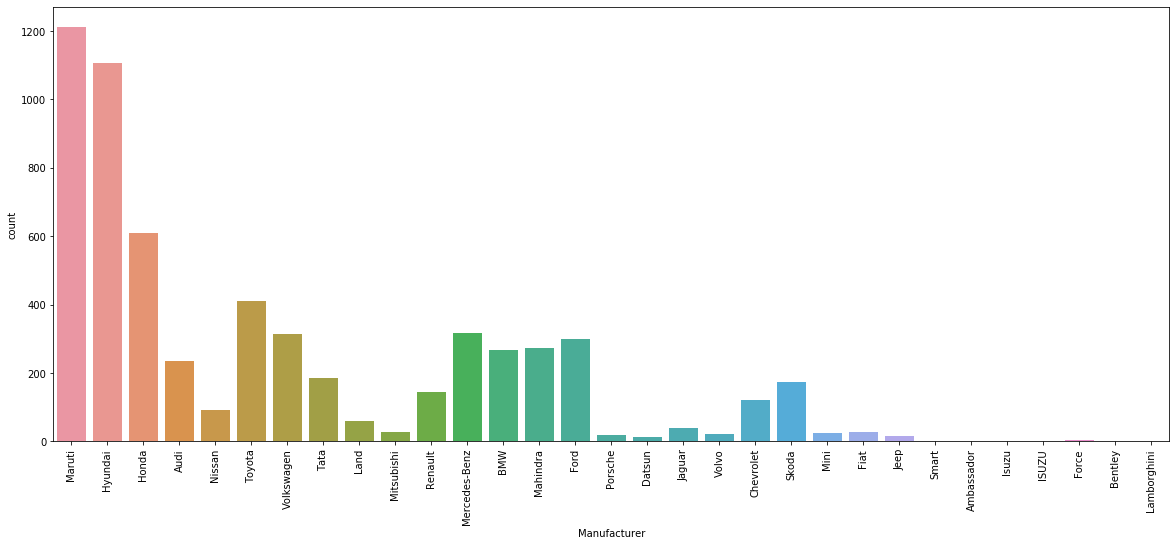

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["Manufacturer"])
plt.xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

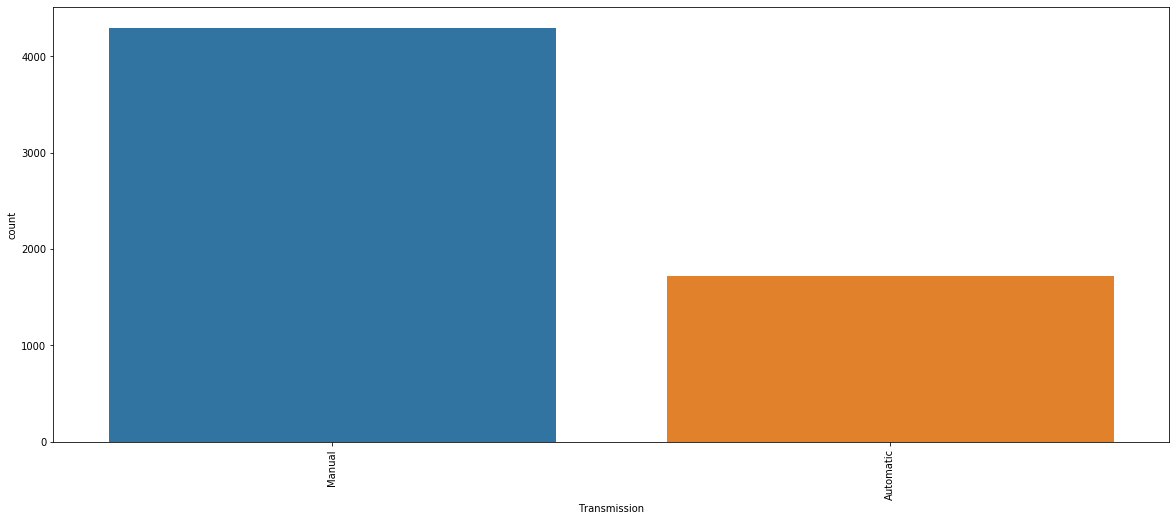

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["Transmission"])
plt.xticks(rotation = 90)


In [11]:
df.drop("Name", axis = 1, inplace = True)


In [12]:
df.drop("Location", axis = 1, inplace = True)


In [13]:
curr_time = datetime.datetime.now()
df['Year'] = df['Year'].apply(lambda x : curr_time.year - x)


In [14]:
df["Kilometers_Driven"]


0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [15]:
mileage_train = df["Mileage"].str.split(" ", expand = True)

df["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')


In [16]:
print(sum(df["Mileage"].isnull()))


2


In [17]:
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)

In [18]:
cc_train = df["Engine"].str.split(" ", expand = True)
df["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')



In [19]:
bhp_train = df["Power"].str.split(" ", expand = True)
df["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')


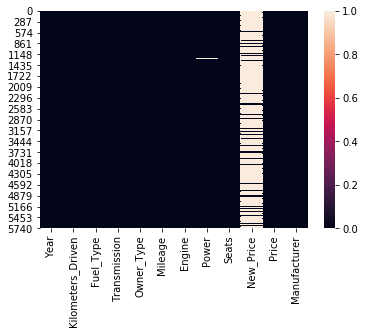

In [20]:
sns.heatmap(df.isnull())

In [21]:
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)

df["Power"].fillna(df["Power"].astype("float64").mean(), inplace = True)

df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)


In [22]:
df.drop(["New_Price"], axis = 1, inplace = True)


In [23]:
df = pd.get_dummies(df,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [24]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,9,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,6,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
X=df.drop("Price",axis=1)
y=df[["Price"]]
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,9,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,6,40670,15.20,1968.0,140.80,5.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

In [28]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = reg.predict(X_test)

In [30]:
pd.DataFrame(y_pred)

,0
0,9.816322
1,5.023572
2,4.770062
3,14.235262
4,14.233018
...,...
1199,4.374055
1200,31.079087
1201,10.612024
1202,6.939393


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7610828346863288

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
reg_dtree=dtree.fit(X_train,y_train)
y_pred_dtree = reg_dtree.predict(X_test)




In [33]:
#MODEL EVALUATION
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtree)))


from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtree)

MAE: 2.289667774086379
MSE: 50.18434802048726
RMSE: 7.084091192276343


0.581374900548596

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train,y_train)
y_pred_randomforest = rfregressor.predict(X_test)
#MODEL EVALUATION

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_randomforest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_randomforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_randomforest)))


from sklearn.metrics import r2_score
r2_score(y_test, y_pred_randomforest)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 1.7197061138796603
MSE: 16.467138983384118
RMSE: 4.057972274841724


0.8626353043027472

In [35]:


# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

# Predicting a new result
y_pred_svr = regressor.predict(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.2

In [36]:
#MODEL EVALUATION

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

MAE: 2.9400204675316814
MSE: 28.641144995562808
RMSE: 5.35174223926777


0.7610828346863288

In [39]:
import xgboost
from xgboost import XGBRegressor
lr=XGBRegressor()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
